# Cricket Test Match Data Cleaning
This notebook cleans and prepares Test cricket batting data for analysis.

## Step 1: Import Libraries
We start by importing the required Python libraries.

In [1]:
import pandas as pd

## Step 2: Load the Dataset
We load the dataset into a pandas DataFrame.

In [2]:
# Import csv
df = pd.read_csv("CricketTestMatchData.csv")
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.6,29,13,7,626+,6
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,2,123,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,1,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,2,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56,10,5,2,104+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525+,23
62,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24
63,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119+,0
64,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241+,5+


## Step 3: Rename Columns and Handling Missing Values
we rename columns with unclear or abbreviated names to improve readability and understanding. Additionally, we address any missing values to ensure data quality.

In [3]:
# rename Multiple columns in a list
df = df.rename(columns = {'Mat':'Matches','NO':'Not_Out', 'HS':'Highest_Inns_Score','BF':'Ball_Face','SR':'Strike_Rate'})

In [4]:
df.head()

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.6,29,13,7,626+,6
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182*,62.31,1839,64.38,5,4,2,123,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,1,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,2,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56,10,5,2,104+,1


In [5]:
# nulls values
df.isnull().any()

Player                False
Span                  False
Matches               False
Inns                  False
Not_Out               False
Runs                  False
Highest_Inns_Score    False
Ave                   False
Ball_Face              True
Strike_Rate            True
100                   False
50                    False
0                     False
4s                    False
6s                    False
dtype: bool

In [6]:
df[df['Ball_Face'].isna()==1]

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s
9,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,NaN,NaN,15,19,6,258+,2
18,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,NaN,NaN,15,14,1,107+,11


In [7]:
df['Ball_Face'] = df['Ball_Face'].fillna(0)

In [8]:
df['Strike_Rate'] = df['Strike_Rate'].fillna(0)

In [9]:
df[df['Player']=='CL Walcott (WI)']

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s
18,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,0,0,15,14,1,107+,11


In [10]:
# Drop Duplicate
df[df.duplicated(keep=False)]

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56,10,5,2,104+,1
5,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56,10,5,2,104+,1
12,GS Sobers (W),1954-1974,93,160,21,8032,365*,57.78,4063+,53.58,26,30,12,593+,32+
13,GS Sobers (W),1954-1974,93,160,21,8032,365*,57.78,4063+,53.58,26,30,12,593+,32+
15,JB Hobbs (ENG),1908-1930,61,102,7,5410,211,56.94,5363+,46.22,15,28,4,276+,8
16,JB Hobbs (ENG),1908-1930,61,102,7,5410,211,56.94,5363+,46.22,15,28,4,276+,8
58,TT Samaraweera (SL),2001-2013,81,132,20,5462,231,48.76,11641,46.92,14,30,11,633,7
59,TT Samaraweera (SL),2001-2013,81,132,20,5462,231,48.76,11641,46.92,14,30,11,633,7


In [11]:
df = df.drop_duplicates()

In [12]:
df[df['Player'].isin(['GA Headley (WI)','GS Sobers (W)','JB Hobbs (ENG)','TT Samaraweera (SL)'])]

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56,10,5,2,104+,1
12,GS Sobers (W),1954-1974,93,160,21,8032,365*,57.78,4063+,53.58,26,30,12,593+,32+
15,JB Hobbs (ENG),1908-1930,61,102,7,5410,211,56.94,5363+,46.22,15,28,4,276+,8
58,TT Samaraweera (SL),2001-2013,81,132,20,5462,231,48.76,11641,46.92,14,30,11,633,7


In [13]:
#Split up span into Start and End Date
df['Span'].str.split(pat= '-')

0     [1928, 1948]
1     [2022, 2025]
2     [2015, 2016]
3     [1963, 1970]
4     [1930, 1954]
          ...     
61    [1965, 1981]
62    [2002, 2014]
63    [1924, 1934]
64    [1930, 1938]
65    [1928, 1934]
Name: Span, Length: 62, dtype: object

In [14]:
df['Span'].str.split(pat= '-').str[0]

0     1928
1     2022
2     2015
3     1963
4     1930
      ... 
61    1965
62    2002
63    1924
64    1930
65    1928
Name: Span, Length: 62, dtype: object

In [19]:
df['Rookie-Year'] = df['Span'].str.split(pat= '-').str[0]

In [20]:
df['Final-Year'] = df['Span'].str.split(pat= '-').str[1]

In [21]:
df

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s,Rookie-Year,Final-Year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.6,29,13,7,626+,6,1928,1948
1,PHKD Mendis (SL),2022-2025,12,21,2,1184,182,62.31,1839,64.38,5,4,2,123,23,2022,2025
2,AC Voges (AUS),2015-2016,20,31,7,1485,269,61.87,2667,55.68,5,4,1,186,5,2015,2016
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,2,246+,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270,60.83,416+,56,10,5,2,104+,1,1930,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,KD Walters (AUS),1965-1981,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525+,23,1965,1981
62,GC Smith (ICC/SA),2002-2014,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014
63,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119+,0,1924,1934
64,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241+,5+,1930,1938


In [22]:
# drop span col
df = df.drop(['Span'], axis = 1)

In [23]:
df.head()

,Player,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s,Rookie-Year,Final-Year
0,DG Bradman (AUS),52,80,10,6996,334,99.94,9800+,58.6,29,13,7,626+,6,1928,1948
1,PHKD Mendis (SL),12,21,2,1184,182,62.31,1839,64.38,5,4,2,123,23,2022,2025
2,AC Voges (AUS),20,31,7,1485,269,61.87,2667,55.68,5,4,1,186,5,2015,2016
3,RG Pollock (SA),23,41,4,2256,274,60.97,1707+,54.48,7,11,2,246+,11,1963,1970
4,GA Headley (WI),22,40,4,2190,270,60.83,416+,56,10,5,2,104+,1,1930,1954


In [24]:
# Split the country from the player name
df['Player'].str.split(pat= '(')

0      [DG Bradman , AUS)]
1      [PHKD Mendis , SL)]
2        [AC Voges , AUS)]
3       [RG Pollock , SA)]
4       [GA Headley , WI)]
              ...         
61     [KD Walters , AUS)]
62    [GC Smith , ICC/SA)]
63    [WH Ponsford , AUS)]
64      [SJ McCabe , AUS)]
65     [DR Jardine , ENG)]
Name: Player, Length: 66, dtype: object

In [25]:
df['Country'] = df['Player'].str.split(pat= '(').str[1]

In [26]:
df['Country'] = df['Country'].str.split(pat= ')').str[0]

In [27]:
df['Country']

0        AUS
1         SL
2        AUS
3         SA
4         WI
       ...  
61       AUS
62    ICC/SA
63       AUS
64       AUS
65       ENG
Name: Country, Length: 66, dtype: object

In [28]:
df['Player']

0      DG Bradman (AUS)
1      PHKD Mendis (SL)
2        AC Voges (AUS)
3       RG Pollock (SA)
4       GA Headley (WI)
            ...        
61     KD Walters (AUS)
62    GC Smith (ICC/SA)
63    WH Ponsford (AUS)
64      SJ McCabe (AUS)
65     DR Jardine (ENG)
Name: Player, Length: 66, dtype: object

In [29]:
df['Player'] = df['Player'].str.split(pat= '(').str[0]

In [30]:
df['Highest_Inns_Score'] = df['Highest_Inns_Score'].str.split(pat= '*').str[0]

AttributeError: Can only use .str accessor with string values!

In [ ]:
df['Highest_Inns_Score'] = df['Highest_Inns_Score'].astype('int')

In [ ]:
df.head()

In [ ]:
# Change Datatype
df.dtypes

In [ ]:
df.head()

In [ ]:
df.dtypes

In [31]:
# Fix Rookie and final year
df = df.astype({'Rookie-Year':'int','Final-Year':'int'})

In [32]:
df.dtypes

Player                 object
Matches                 int32
Inns                    int64
Not_Out                 int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Ball_Face              object
Strike_Rate            object
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Rookie-Year             int32
Final-Year              int32
Country                object
dtype: object

In [33]:
df.head()

,Player,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s,Rookie-Year,Final-Year,Country
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.6,29,13,7,626+,6,1928,1948,AUS
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64.38,5,4,2,123,23,2022,2025,SL
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,1,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,2,246+,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270,60.83,416+,56,10,5,2,104+,1,1930,1954,WI


In [34]:
df['Matches'] = df['Matches'].astype(str).str.split('*').str[0]

In [35]:
df['Matches'] = df['Matches'].astype('int')

In [36]:
df.dtypes

Player                 object
Matches                 int32
Inns                    int64
Not_Out                 int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Ball_Face              object
Strike_Rate            object
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Rookie-Year             int32
Final-Year              int32
Country                object
dtype: object

In [37]:
df['Ball_Face'] = df['Ball_Face'].astype(str).str.split('+').str[0]

In [38]:
df.tail(10)

,Player,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s,Rookie-Year,Final-Year,Country
56,B Mitchell,42,80,9,3471,189,48.88,158,29.11,8,21,3,41+,1,1929,1949,SA
57,Hon.FS Jackson,20,33,4,1415,144,48.79,-,-,5,6,3,51+,0,1893,1905,ENG
58,TT Samaraweera,81,132,20,5462,231,48.76,11641,46.92,14,30,11,633,7,2001,2013,SL
59,TT Samaraweera,81,132,20,5462,231,48.76,11641,46.92,14,30,11,633,7,2001,2013,SL
60,RN Harvey,79,137,10,6149,205,48.41,1799,43.74,21,24,7,427+,1,1948,1963,AUS
61,KD Walters,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525+,23,1965,1981,AUS
62,GC Smith,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,2002,2014,ICC/SA
63,WH Ponsford,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119+,0,1924,1934,AUS
64,SJ McCabe,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241+,5+,1930,1938,AUS
65,DR Jardine,22,33,6,1296,127,48.00,2110,25.59,1,10,2,53+,0,1928,1934,ENG


In [39]:
df['Ball_Face'] = df['Ball_Face'].replace('-', pd.NA)

In [40]:
df['Ball_Face'] = df['Ball_Face'].fillna(0)

In [41]:
df['Ball_Face'] = df['Ball_Face'].astype(int)

In [42]:
df.dtypes

Player                 object
Matches                 int32
Inns                    int64
Not_Out                 int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Ball_Face               int32
Strike_Rate            object
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Rookie-Year             int32
Final-Year              int32
Country                object
dtype: object

In [43]:
df['Strike_Rate'] = pd.to_numeric(df['Strike_Rate'], errors='coerce')

In [44]:
df['Strike_Rate'] = df['Strike_Rate'].fillna(0).astype(int)

In [45]:
df.dtypes

Player                 object
Matches                 int32
Inns                    int64
Not_Out                 int64
Runs                    int64
Highest_Inns_Score      int32
Ave                   float64
Ball_Face               int32
Strike_Rate             int32
100                     int64
50                      int64
0                       int64
4s                     object
6s                     object
Rookie-Year             int32
Final-Year              int32
Country                object
dtype: object

In [46]:
# Career length
df['Career_Length'] = df['Final-Year'] - df['Rookie-Year']

In [47]:
df

,Player,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s,Rookie-Year,Final-Year,Country,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58,29,13,7,626+,6,1928,1948,AUS,20
1,PHKD Mendis,12,21,2,1184,182,62.31,1839,64,5,4,2,123,23,2022,2025,SL,3
2,AC Voges,20,31,7,1485,269,61.87,2667,55,5,4,1,186,5,2015,2016,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54,7,11,2,246+,11,1963,1970,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56,10,5,2,104+,1,1930,1954,WI,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,KD Walters,74,125,14,5357,250,48.26,8662,49,15,33,4,525+,23,1965,1981,AUS,16
62,GC Smith,117,205,13,9265,277,48.25,15525,59,27,38,11,1165,24,2002,2014,ICC/SA,12
63,WH Ponsford,29,48,4,2122,266,48.22,3118,44,7,6,1,119+,0,1924,1934,AUS,10
64,SJ McCabe,39,62,5,2748,232,48.21,3217,60,6,13,4,241+,5+,1930,1938,AUS,8


In [48]:
# Avg Career Length
df['Career_Length'].mean()

13.393939393939394

In [49]:
# Avg Strike Rate for cricket who played over 10 years
df[df['Career_Length'] > 10]['Strike_Rate'].mean()

47.61702127659574

## Step 3: Exploratory Data Analysis and Visualization

In [50]:
# Basic statistical summary
df.describe(include='all')

,Player,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Ball_Face,Strike_Rate,100,50,0,4s,6s,Rookie-Year,Final-Year,Country,Career_Length
count,66,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66,66,66.000000,66.000000,66,66.000000
unique,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,36,NaN,NaN,14,NaN
top,GA Headley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104+,1,NaN,NaN,AUS,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,5,NaN,NaN,15,NaN
mean,NaN,77.848485,131.984848,13.863636,6269.787879,251.666667,53.951364,9597.833333,47.484848,18.909091,27.939394,7.772727,NaN,NaN,1969.924242,1983.318182,NaN,13.393939
std,NaN,50.974878,86.750835,11.180872,4028.510752,61.950187,7.071502,9084.094593,15.215622,12.403135,18.722984,5.428686,NaN,NaN,35.645826,34.053875,NaN,5.966261
min,NaN,12.000000,20.000000,1.000000,990.000000,122.000000,48.000000,0.000000,0.000000,1.000000,3.000000,1.000000,NaN,NaN,1893.000000,1905.000000,NaN,1.000000
25%,NaN,23.500000,41.000000,5.000000,2206.500000,208.750000,49.660000,1888.000000,42.250000,7.250000,10.250000,3.000000,NaN,NaN,1935.500000,1954.250000,NaN,10.000000
50%,NaN,79.000000,131.500000,12.000000,5978.000000,245.000000,52.170000,5960.500000,49.000000,18.000000,28.000000,7.000000,NaN,NaN,1975.000000,1992.000000,NaN,14.500000
75%,NaN,116.750000,196.250000,19.000000,8831.500000,278.000000,56.890000,15507.750000,55.000000,27.750000,40.250000,11.750000,NaN,NaN,2000.000000,2013.000000,NaN,17.000000


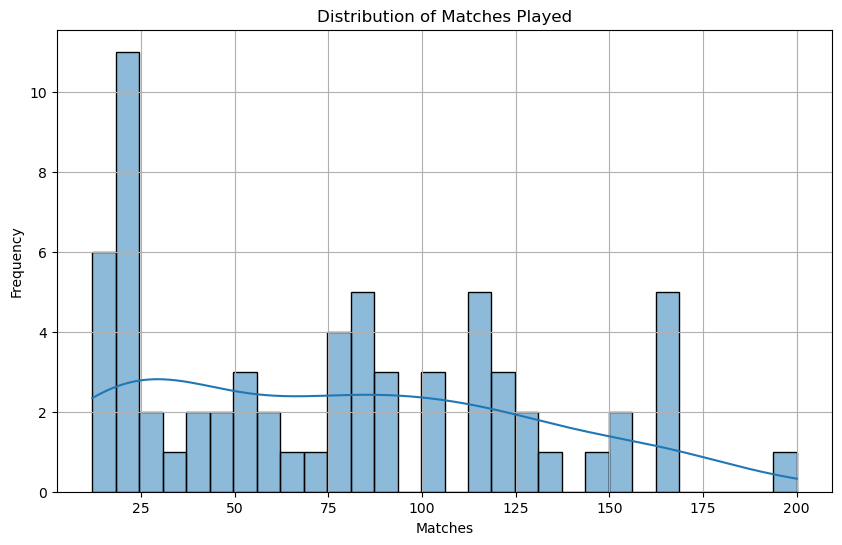

In [51]:
# Distribution of Matches Played
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['Matches'], bins=30, kde=True)
plt.title('Distribution of Matches Played')
plt.xlabel('Matches')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\TEXON-WARE\AppData\Local\Temp\ipykernel_11408\2636029765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_runs, x='Player', y='Runs', palette='viridis')


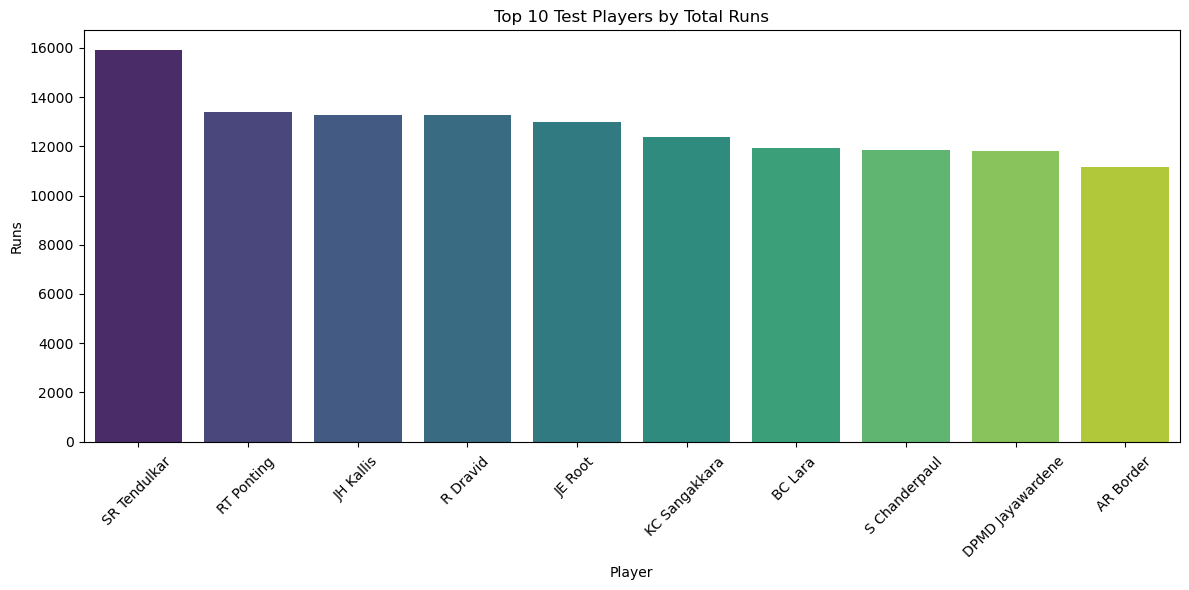

In [52]:
# Top 10 Players by Total Runs
top_runs = df.sort_values('Runs', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(data=top_runs, x='Player', y='Runs', palette='viridis')
plt.title('Top 10 Test Players by Total Runs')
plt.xticks(rotation=45)
plt.ylabel('Runs')
plt.tight_layout()
plt.show()

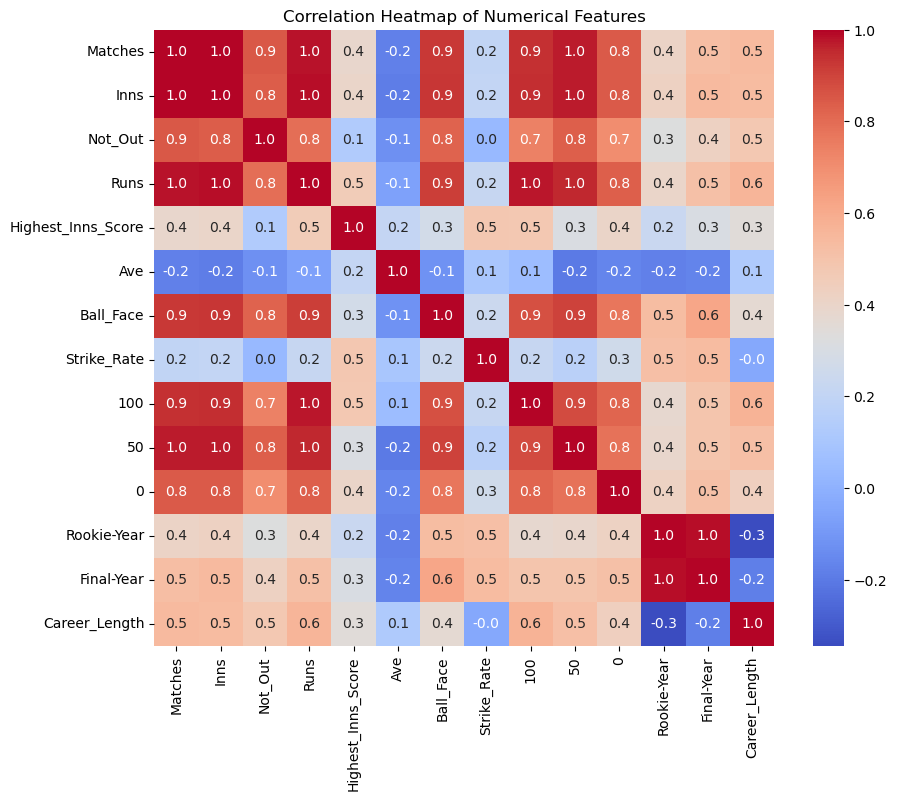

In [53]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Final Summary
- Renamed columns for clarity  
- Removed unwanted characters from scores  
- Handled missing and non-numeric data  
- Visualized top run scorers  

The dataset is now cleaned and ready for deeper analysis or modeling.